In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree   # функция для отрисовки дерева
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

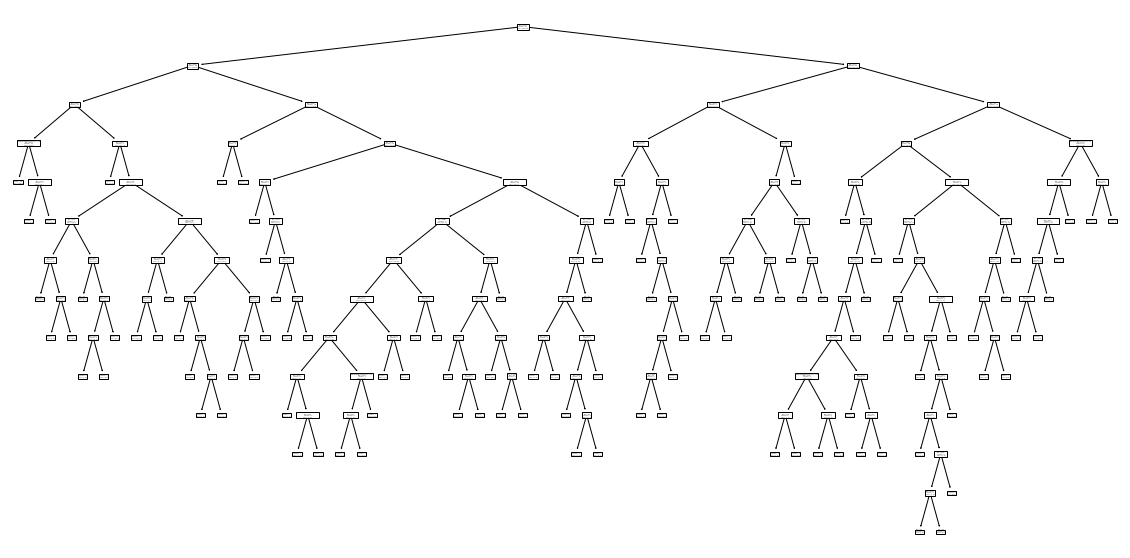

In [19]:
clf = DecisionTreeClassifier() # Создаем экземпляр класса
clf = clf.fit(X_train, y_train) # Обучаем модель
plt.figure(figsize=(20,10)) 
plot_tree(clf,  feature_names = X.columns) # Отобразим дерево
plt.show()

In [7]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.77      0.80        99\n           1       0.63      0.71      0.67        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n'

In [8]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2, 5, 10, 20, 100]} 
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, parameters)
grid.fit(X_train, y_train)
grid.best_estimator_ 

DecisionTreeClassifier(max_depth=2)

In [21]:
clf = DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.88      0.83        99\n           1       0.73      0.58      0.65        55\n\n    accuracy                           0.77       154\n   macro avg       0.76      0.73      0.74       154\nweighted avg       0.77      0.77      0.77       154\n'

Из преведённых моделей лучше всего задачу классификации решает последняя обученная модель